In [19]:
import pandas as pd
import numpy as np

In [142]:
df = pd.read_csv('BankChurners.csv')
df2 = pd.read_csv('BankChurnersColums.csv', delimiter=';')

In [143]:
# Dropando a coluna CLIENTNUM e também as 2 últimas colunas
df = df.drop(['CLIENTNUM',
            'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
            'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
             axis=1)

In [144]:
# Renomeando e dropando valores nulos da coluna Income_Category
df.replace({'Income_Category':{'Unknown': np.nan}}, inplace = True)
df.dropna(inplace=True)

In [145]:
# Checando se o Dataframe não possui NaNs
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [146]:
# Criando dummies a partir da coluna Attrition_Flag
df = pd.get_dummies(df, columns=['Attrition_Flag'], prefix='Att')

In [147]:
df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Att_Attrited Customer,Att_Existing Customer
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,1
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,1
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1


### Relação Income / Churn

In [148]:
df_churn = df.groupby(['Income_Category'])[['Att_Attrited Customer', 'Att_Existing Customer']].sum()/df.groupby(['Income_Category'])[['Att_Attrited Customer', 'Att_Existing Customer']].count()
df_churn.rename({'Att_Attrited Customer':'Attrited Customer'}, axis=1, inplace = True)
df_churn.rename({'Att_Existing Customer':'Existing Customer'}, axis=1, inplace = True)
df_churn

,Attrited Customer,Existing Customer
Income_Category,,
$120K +,0.173315,0.826685
$40K - $60K,0.151397,0.848603
$60K - $80K,0.134807,0.865193
$80K - $120K,0.157655,0.842345
Less than $40K,0.171862,0.828138


In [149]:
df_Attrited_sum = df.groupby(['Income_Category'], as_index=False)['Att_Attrited Customer'].sum()
df_Attrited_count = df.groupby(['Income_Category'], as_index=False)['Att_Attrited Customer'].count()
df_Attrited = (df_Attrited_sum['Att_Attrited Customer'] / df_Attrited_count['Att_Attrited Customer'])*100

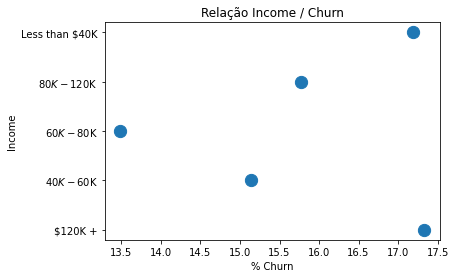

In [150]:
plt.scatter(df_Attrited, df_Attrited_sum['Income_Category'], s=150)
plt.title('Relação Income / Churn')
plt.ylabel('Income')
plt.xlabel('% Churn')
plt.show()

### Desconsiderar códigos abaixo (apenas testando condições)

In [154]:
# Identificado a faixa etária dos clientes
print(f'Idade mínima: {df.Customer_Age.min()}\nIdade média: {df.Customer_Age.median()}\nIdade máxima: {df.Customer_Age.max()}')

Idade mínima: 26
Idade média: 46.0
Idade máxima: 73


In [7]:
# Função para definição da faixa etária
def ajusta_faixa_etaria(i):
    if i < 19:
        return 1
    elif i > 19 and i <= 34:
        return 2
    elif i > 34 and i <= 49:
        return 3
    elif i > 49 and i <= 64:
        return 4
    else:
        return 5

# Cria a coluna 'Age' e seta a faixa etária sendo:
# 1 = Até 19 anos
# 2 = Entre 20 e 34 anos
# 3 = Entre 35 e 49 anos
# 4 = Entre 50 e 64 anos
# 5 = Acima de 65 anos

df['Age'] = df.Customer_Age.apply(ajusta_faixa_etaria)

In [8]:
# Agrupando os clientes por faixa etária
df['Age'].value_counts(normalize = True)

3    0.582030
4    0.338436
2    0.069773
5    0.009762
Name: Age, dtype: float64

In [ ]:
# 92% dos clientes tem entre 35 e 64 anos

In [9]:
# Agrupando os clientes por rendimento anual
df['Income_Category'].value_counts(normalize = True)

Less than $40K    0.395008
$40K - $60K       0.198558
$80K - $120K      0.170272
$60K - $80K       0.155519
$120K +           0.080643
Name: Income_Category, dtype: float64

In [10]:
# Relação Income / Churn
df.groupby(['Attrition_Flag','Income_Category'])[['Income_Category']].count()

Income_Category
Attrition_Flag    Income_Category                 
Attrited Customer $120K +                      126
                  $40K - $60K                  271
                  $60K - $80K                  189
                  $80K - $120K                 242
                  Less than $40K               612
Existing Customer $120K +                      601
                  $40K - $60K                 1519
                  $60K - $80K                 1213
                  $80K - $120K                1293
                  Less than $40K              2949

In [530]:
df.groupby(['Attrition_Flag','Age'])[['Income_Category']].count()

Income_Category
Attrition_Flag    Age                 
Attrited Customer 2                 90
                  3                849
                  4                493
                  5                  8
Existing Customer 2                539
                  3               4398
                  4               2558
                  5                 80

In [531]:
# Relação Income / Churn por idade
df.groupby(['Age','Attrition_Flag','Income_Category'])[['Income_Category']].count()

Income_Category
Age Attrition_Flag    Income_Category                 
2   Attrited Customer $120K +                        6
                      $40K - $60K                   15
                      $60K - $80K                   14
                      $80K - $120K                   8
                      Less than $40K                47
    Existing Customer $120K +                       22
                      $40K - $60K                  135
                      $60K - $80K                   72
                      $80K - $120K                  55
                      Less than $40K               255
3   Attrited Customer $120K +                       57
                      $40K - $60K                  176
                      $60K - $80K                  116
                      $80K - $120K                 147
                      Less than $40K               353
    Existing Customer $120K +                      291
                      $40K - $60K                  892
                      $60K - $80K                  781
                      $80K - $120K                 784
                      Less than $40K              1650
4   Attrited Customer $120K +                       63
                      $40K - $60K                   80
                      $60K - $80K                   59
                      $80K - $120K                  87
                      Less than $40K               204
    Existing Customer $120K +                      288
                      $40K - $60K                  465
                      $60K - $80K                  360
                      $80K - $120K                 454
                      Less than $40K               991
5   Attrited Customer Less than $40K                 8
    Existing Customer $40K - $60K                   27
                      Less than $40K                53

### Relação Education_Level / Churn

In [129]:
df_education = df.groupby(['Education_Level'])[['Att_Attrited Customer', 'Att_Existing Customer']].sum()/df.groupby(['Education_Level'])[['Att_Attrited Customer', 'Att_Existing Customer']].count()
df_education.rename({'Att_Attrited Customer':'Attrited Customer'}, axis=1, inplace = True)
df_education.rename({'Att_Existing Customer':'Existing Customer'}, axis=1, inplace = True)
df_education

,Attrited Customer,Existing Customer
Education_Level,,
College,0.152486,0.847514
Doctorate,0.207349,0.792651
Graduate,0.156652,0.843348
High School,0.147092,0.852908
Post-Graduate,0.187633,0.812367
Uneducated,0.157450,0.842550
Unknown,0.166667,0.833333


### Relação Marital_Status / Churn

In [130]:
df_marital = df.groupby(['Marital_Status'])[['Att_Attrited Customer', 'Att_Existing Customer']].sum()/df.groupby(['Marital_Status'])[['Att_Attrited Customer', 'Att_Existing Customer']].count()
df_marital.rename({'Att_Attrited Customer':'Attrited Customer'}, axis=1, inplace = True)
df_marital.rename({'Att_Existing Customer':'Existing Customer'}, axis=1, inplace = True)
df_marital

,Attrited Customer,Existing Customer
Marital_Status,,
Divorced,0.163359,0.836641
Married,0.150453,0.849547
Single,0.168620,0.831380
Unknown,0.167916,0.832084


### Relação Card_Category / Churn

In [131]:
df_card = df.groupby(['Card_Category'])[['Att_Attrited Customer', 'Att_Existing Customer']].sum()/df.groupby(['Card_Category'])[['Att_Attrited Customer', 'Att_Existing Customer']].count()
df_card.rename({'Att_Attrited Customer':'Attrited Customer'}, axis=1, inplace = True)
df_card.rename({'Att_Existing Customer':'Existing Customer'}, axis=1, inplace = True)
df_card

,Attrited Customer,Existing Customer
Card_Category,,
Blue,0.160052,0.839948
Gold,0.177570,0.822430
Platinum,0.200000,0.800000
Silver,0.149402,0.850598


In [134]:
df_utilization = df.groupby(['Avg_Utilization_Ratio'])[['Att_Attrited Customer', 'Att_Existing Customer']].sum()/df.groupby(['Avg_Utilization_Ratio'])[['Att_Attrited Customer', 'Att_Existing Customer']].count()
df_utilization.rename({'Att_Attrited Customer':'Attrited Customer'}, axis=1, inplace = True)
df_utilization.rename({'Att_Existing Customer':'Existing Customer'}, axis=1, inplace = True)
df_utilization

,Attrited Customer,Existing Customer
Avg_Utilization_Ratio,,
0.000,0.365021,0.634979
0.005,1.000000,0.000000
0.006,1.000000,0.000000
0.007,1.000000,0.000000
0.008,1.000000,0.000000
...,...,...
0.988,0.000000,1.000000
0.990,1.000000,0.000000
0.994,0.000000,1.000000


In [151]:
def ajusta_aur(i):
    if i < 0.25:
        return 1
    elif i > 0.25 and i <= 0.50:
        return 2
    elif i > 0.50 and i <= 0.75:
        return 3
    else:
        return 4
    
df['Aur'] = df.Avg_Utilization_Ratio.apply(ajusta_aur)

In [152]:
df = pd.get_dummies(df, columns=['Aur'], prefix='Att')

In [153]:
df

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Att_Attrited Customer,Att_Existing Customer,Att_1,Att_2,Att_3,Att_4
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,...,1144,42,1.625,0.061,0,1,1,0,0,0
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,...,1291,33,3.714,0.105,0,1,1,0,0,0
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,...,1887,20,2.333,0.000,0,1,1,0,0,0
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,...,1171,20,2.333,0.760,0,1,0,0,0,1
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,...,816,28,2.500,0.000,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,...,15476,117,0.857,0.462,0,1,0,1,0,0
10123,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,...,8764,69,0.683,0.511,1,0,0,0,1,0
10124,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,...,10291,60,0.818,0.000,1,0,1,0,0,0
10125,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,...,8395,62,0.722,0.000,1,0,1,0,0,0
